In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate as interp
from itertools import product

In [5]:
import os
os.getcwd()

'/Users/senwang/Documents/Knowledge/courses/Notre Dame/Machine Learning - An Introduction/Class Project'

In [15]:
cell_data = pd.read_csv("data/U2/raw/cell_data.csv")
point_data = pd.read_csv("data/U2/raw/point_data.csv")

In [30]:
point_data.shape

(82357, 13)

In [17]:
points = point_data.iloc[:,7:10]
U = point_data.iloc[:,0:3]
blockId = point_data.iloc[:,-1]
pointId = point_data.iloc[:,-3]

In [18]:
blockName = {"InternalMesh": 1,
             "Inlet"       : 3,
             "Outlet"      : 4,
             "Ground"      : 5,
             "frontAndBack": 6,
             "boxes"       : 7}

In [19]:
cleanPointData = pd.concat([pointId, blockId, points, U], axis=1)
cleanPointData.columns = ['pointId', 'blockId', 'x', 'y','z','u', 'v', 'w']

In [20]:
cleanPointData['blockId'] = cleanPointData['blockId'].astype('category')

In [21]:
cleanPointData['blockId'].cat.categories = ["InternalMesh", "Inlet", "Outlet", "Ground", "frontAndBack", "boxes"]

In [22]:
cleanPointData.head()

,pointId,blockId,x,y,z,u,v,w
0,0,InternalMesh,0.00000,0.0,0.0,-0.000581,1.99848,0.002026
1,1,InternalMesh,3.99740,-0.0,0.0,-0.001143,1.99843,0.002060
2,2,InternalMesh,7.99511,-0.0,0.0,-0.002210,1.99830,0.002171
3,3,InternalMesh,11.99330,-0.0,0.0,-0.003123,1.99811,0.002360
4,4,InternalMesh,15.99230,-0.0,0.0,-0.003790,1.99784,0.002611


In [25]:
cleanPointData.iloc[:,0:5].to_csv("data/U2/points.csv")
cleanPointData.iloc[:,[0,1,5,6,7]].to_csv("data/U2/U.csv")

In [26]:
T_data = pd.read_csv("data/U2/raw/T_data.csv")

In [31]:
T_data.head()

,T,U:0,U:1,U:2,Result,Points:0,Points:1,Points:2,vtkOriginalIndices,__vtkIsSelected__,vtkCompositeIndexArray
0,1.081540e-21,-0.000581,1.99848,0.002026,1.081540e-21,0.00000,0.0,0.0,0,0,1
1,1.209930e-20,-0.001143,1.99843,0.002060,1.209930e-20,3.99740,-0.0,0.0,1,0,1
2,-1.356980e-19,-0.002210,1.99830,0.002171,-1.356980e-19,7.99511,-0.0,0.0,2,0,1
3,-2.647980e-18,-0.003123,1.99811,0.002360,-2.647980e-18,11.99330,-0.0,0.0,3,0,1
4,6.847430e-18,-0.003790,1.99784,0.002611,6.847430e-18,15.99230,-0.0,0.0,4,0,1


In [34]:
T = T_data[['T','vtkOriginalIndices']]

In [36]:
T.columns = ['T','pointId']

In [38]:
T.to_csv("data/U2/T.csv")

## Construct 2D grid points

In [10]:
cleanPointData = pd.read_csv("data/points.csv")
cleanUData = pd.read_csv("data/U.csv")

points = cleanPointData[['x','y','z']]
U = cleanUData[['u','v','w']]

x = np.arange(0,101,1)
y = np.arange(0,151,1)
z = 1
xx,yy,zz = np.meshgrid(x,y,z)

grid = np.concatenate([xx,yy,zz], axis=2)

grid = grid.astype(np.float)

# Now we need to clean up grid such that it doesn't contain any point witin the boxes
boxCtr = list(product([30,50,70],[50,70,90]))

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        for box in boxCtr:
            if abs(grid[i,j,0] - box[0]) < 5 and abs(grid[i,j,1] - box[1]) < 5:
                grid[i,j,:] = [np.nan, np.nan, np.nan]
            else:
                continue

flatGrid = grid.reshape(-1,3)

flatGrid.shape

# Interpolate velocity field at this level
ugrid = interp.griddata(points.values, U.values[:,0], flatGrid)
vgrid = interp.griddata(points.values, U.values[:,1], flatGrid)
wgrid = interp.griddata(points.values, U.values[:,2], flatGrid)

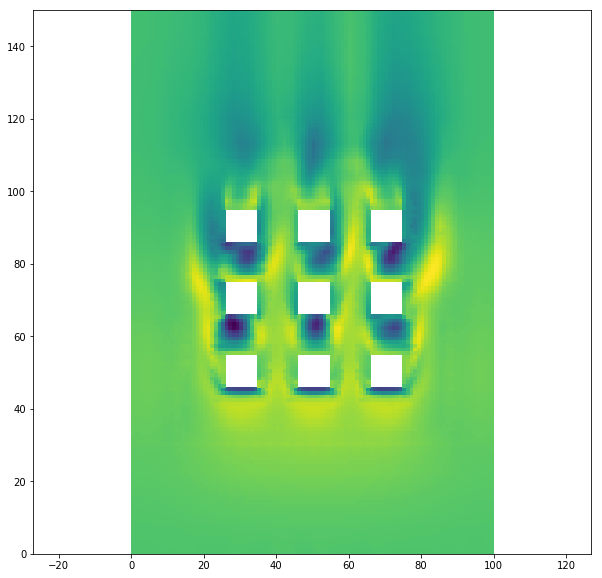

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pcolor(xx[:,:,0], yy[:,:,0], wgrid.reshape(151,101))
plt.axis("equal")
plt.show()

(151, 101, 1)